In [23]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
from sklearn import *
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

loc = 'workstation'
if loc == 'workstation':
    wd = 'C:/Users/sammirc/Desktop/postdoc/tuningcurves'
elif loc == 'laptop':
    wd = '/Users/sammichekroud/Desktop/postdoc/tuningcurves'
sys.path.insert(0, op.join(wd, 'analysis', 'tools'))
os.chdir(wd)
from funcs import getSubjectInfo
from TuningCurveFuncs import makeTuningCurve, getTuningCurve_FullSpace, createFeatureBins, visualise_FeatureBins

os.chdir(wd)
subs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,     11, 12, 13, 14, 15, 16, 17, 18,     20, 21, 22,     24, 25, 26])
#1,2,3,10,19 all have only 1 session. 23 something wrong in the second session, completely unusable eeg data due to serious noise
nsubs = subs.size
#set params for what file to load in per subject
binstep  = 15
binwidth = 22
#binstep, binwidth = 4, 11

times = np.load(op.join(wd, 'data', 'tuningcurves', 'times.npy'))
ntimes = times.size
nitems = 2 #two items are presented in the array, we 'decode' both

nbins, binmids, binstarts, binends = createFeatureBins(binstep = binstep, binwidth = binwidth,
                                                       feature_start = -90+binstep, feature_end = 90)
smooth_alphas = True
if smooth_alphas:
    smooth_sigma=3
else:
    smooth_sigma=None

#read in data
alldata = np.zeros(shape = [subs.size, nitems, binmids.size, ntimes]) * np.nan #2 because 2 items decoded
subcount = -1
print(f'loading in {subs.size} participants')
alpha = np.zeros(shape = [nsubs, nitems, ntimes]) * np.nan
beta  = np.zeros(shape = [nsubs, nitems, ntimes]) * np.nan
for i in subs:
    subcount +=1
    #print(f'working on ppt {subcount+1}/{subs.size}')
    a = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'fixedalpha_b1only',
                    f's{i}_ParamFits_Alpha_binstep{binstep}_binwidth{binwidth}_smoothedAlpha_{smooth_alphas}{smooth_sigma}_no_bzero.npy'))
    b = np.load(op.join(wd, 'data', 'tuningcurves', 'parameter_fits', 'fixedalpha_b1only',
                    f's{i}_ParamFits_Beta_binstep{binstep}_binwidth{binwidth}_smoothedAlpha_{smooth_alphas}{smooth_sigma}_no_bzero.npy'))

    alpha[subcount] = np.nanmean(a, axis=1) #average across trials
    beta[subcount]  = np.nanmean(b, axis=1) #average across trials
print('done')

alpha_ave = alpha.copy().mean(axis=1) #average across items
beta_ave  = beta.copy().mean(axis=1) #average across items

loading in 20 participants
done


In [17]:
print(alpha.shape)
print(beta.shape)


(20, 2, 175)
(20, 2, 175)


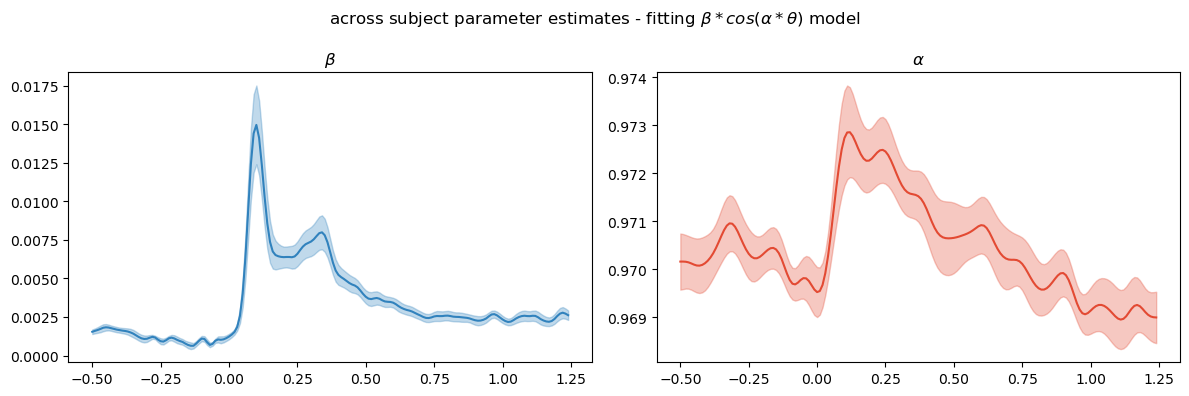

In [24]:
am = np.nanmean(alpha_ave, axis = 0)
bm = np.nanmean(beta_ave,  axis = 0)

asem = sp.stats.sem(alpha_ave, axis=0, ddof=0, nan_policy='omit')
bsem = sp.stats.sem(beta_ave,  axis=0, ddof=0, nan_policy='omit')

fig = plt.figure(figsize = [12, 4])
ax = fig.add_subplot(1,2,1)
ax.plot(times, bm, lw = 1.5, color = '#3182bd', label = '$\\beta$')
ax.fill_between(times, np.add(bm, bsem), np.subtract(bm, bsem),
                edgecolor = None, color = '#3182bd', alpha = 0.3)
ax.set_title('$\\beta$'); #ax.set_ylim([-10,0])

ax = fig.add_subplot(1,2,2)
ax.plot(times, am, lw = 1.5, color = '#e34a33', label = '$\\alpha$')
ax.fill_between(times, np.add(am, asem), np.subtract(am, asem),
                edgecolor = None, color = '#e34a33', alpha = 0.3)
ax.set_title('$\\alpha$')
fig.suptitle(f'across subject parameter estimates - fitting $\\beta * cos(\\alpha * \\theta)$ model')
fig.tight_layout()

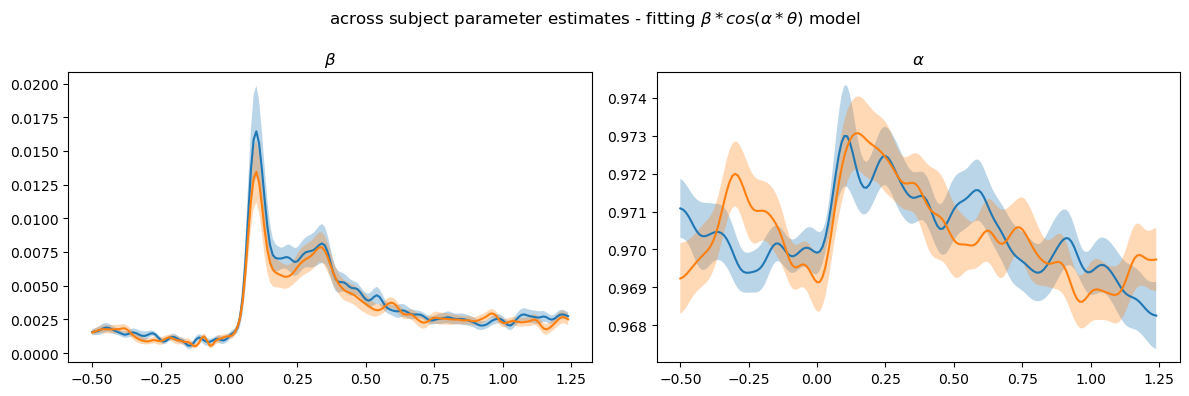

In [15]:
#plot items separately on the same figure to see if it matters much, or whether can average
am2 = np.nanmean(alpha, axis = 0)
bm2 = np.nanmean(beta,  axis = 0)

asem = sp.stats.sem(alpha, axis=0, ddof=0, nan_policy='omit')
bsem = sp.stats.sem(beta,  axis=0, ddof=0, nan_policy='omit')

fig = plt.figure(figsize = [12, 4])
ax = fig.add_subplot(1,2,1)
for item in range(nitems):
    ax.plot(times, bm2[item], lw = 1.5)
    ax.fill_between(times, np.add(bm2[item], bsem[item]), np.subtract(bm2[item], bsem[item]),
                    edgecolor=None, alpha = 0.3)
ax.set_title('$\\beta$'); #ax.set_ylim([-10,0])

ax = fig.add_subplot(1,2,2)
for item in range(nitems):
    ax.plot(times, am2[item], lw = 1.5)
    ax.fill_between(times, np.add(am2[item], asem[item]), np.subtract(am2[item], asem[item]),
                    edgecolor = None, alpha = 0.3)
ax.set_title('$\\alpha$')
fig.suptitle(f'across subject parameter estimates - fitting $\\beta * cos(\\alpha * \\theta)$ model')
fig.tight_layout()